# 1. Let's import the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
# an alternative is to load using native python using the open method
with open("train.csv") as file:
    data = file.readlines()
    

In [4]:
type(data)

list

This is not a very friendly format. So I recommend using pandas for this types of problems

# 2. EDA (Exploratory data analysis)

Now, that we have the necessary data, the first step is to understand our data. 

In [5]:
# columns information
list(df.columns)


['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
print(f"Total number of columns are {len(list(df.columns))}")

Total number of columns are 12


All of this columns are not the same, and it is important to make two differences. We need to separate the feature columns from our target column. In this case, the target column is **Survived**.
Let's take a look on that data. Also the **PassengerId** is not important for the model because I assume that the id is total uncorrelated with the probability of survival

In [7]:
# Let's seperate the dataset
y = df[["Survived"]] 

In [8]:
X = df.copy(deep=True) # Let's do a copy in order to preseve the df dataset in memory and saved from inplace operations

In [9]:
# Let's remove passenger id, and consider be moved -1
X = X.drop("PassengerId", axis=1)

In [10]:
X

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
# For our first version of the model let's remove also Name and ticket from the equation
col_to_remove = ["Name", "Ticket", "Cabin"]
for col in col_to_remove:
    try:
        X = X.drop(col, axis=1) # can use inplace=True
    except KeyError:
        print(f"{col} not in data")

In [12]:
# Let's take a look in the dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


As we can see from the dataset there are some empty and some different types of objects that we have to take a look. 

Let's compute some plots to see the distribution of the data. 

In [13]:
import matplotlib.pyplot as plt

In [14]:
columns = X.columns[:-1] # Embarked cannot be plotted just yet because is not either categorical or converted to numbers

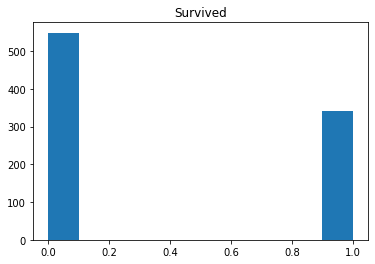

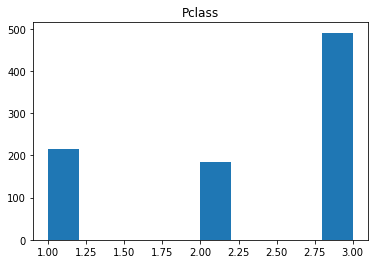

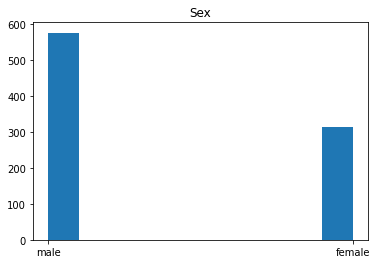

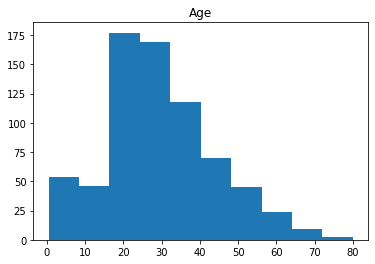

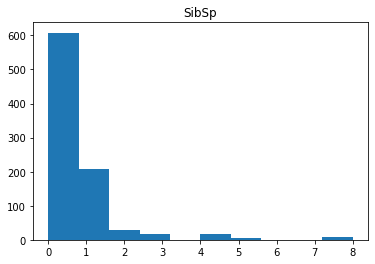

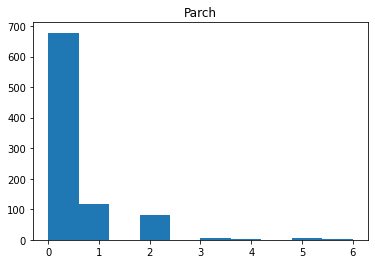

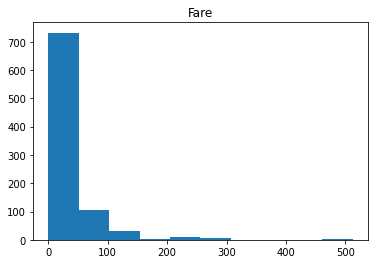

In [15]:
for col in columns:
    plt.hist(x=df[col])
    plt.title(col)
    plt.show()

Given this data, we have a better understanding of the data. And this helps to understand better how how should fill the values for the age. Let's start by filling with the average age


In [16]:
# If we analyse some of the features with the predict label 
X[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We can see that people on the best classes had better chances of survival

In [17]:
X[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


People from the female sex, as expected, had better chances of survival

In [18]:
X[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
X[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [20]:
X.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

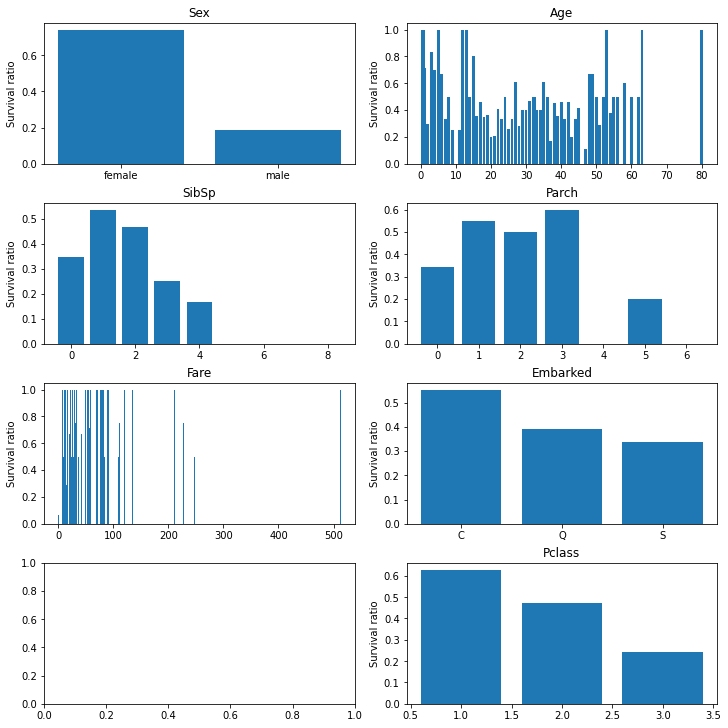

In [21]:
# Lets compare the feature values with predict label
fig, axs = plt.subplots(4, 2, figsize=(10, 10), constrained_layout=True)

for i, col in enumerate(X.columns[1:]):
    sub_cols = [col, "Survived"]

    data = X[sub_cols].groupby([col], as_index=False).mean()

    axs.flat[i-1].bar(data[col], data["Survived"])
    axs.flat[i-1].set_title(col)
    axs.flat[i-1].set_ylabel("Survival ratio")

# 3. Data filling


In [22]:
import numpy as np
age_mean = np.mean(X.Age)

In [23]:
X.loc[:, ["Age"]] = X.Age.fillna(value=age_mean)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Only **Embarked** missing. This, like gender are a very speacial type of variable, that we discussed. So, what we can do is to convert this, into categorical variable first. There are several techniques, that I we are going to test later, but for now we are going to do label encoding by mapping the categorical variable into a integer. We need to be careful with this because this might lead to trouble in linear models. 

In [25]:
# The first thing we do is to identify the unique variables
X.loc[:, "Sex"].unique()

array(['male', 'female'], dtype=object)

# 4. Encode Categorical variables

In [26]:
# as expected so now we need to map it to 0 and 1
sex_map = {"male": 0, "female": 1}
X.loc[:, "Sex"] = X.loc[:, "Sex"].apply(lambda x: sex_map[x] )
# This could also be done using LabelEncoder

In [27]:
# now for embarked 
# convert to categorical 
X['Embarked'] = pd.Categorical(X.Embarked)

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    int64   
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(1), float64(2), int64(5)
memory usage: 49.9 KB


In [29]:
# The first thing we do is to identify the unique variables
X.loc[:, "Embarked"].unique()

['S', 'C', 'Q', NaN]
Categories (3, object): ['C', 'Q', 'S']

In [30]:
# Let's count the most frequent embark location
X["Embarked"].value_counts() # Let's replace by S

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
X["Embarked"] = X["Embarked"].fillna(value="S")

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    int64   
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(1), float64(2), int64(5)
memory usage: 49.9 KB


In [33]:
Embarked_map = {"S":0, "C":1, "Q":2}
X.loc[:, "Embarked"] = X.loc[:, "Embarked"].apply(lambda x: Embarked_map[x] )

In [34]:
# conver Embarked to integer
X.Embarked = X.Embarked.astype("int") 

# 5.Split data into train and test

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X.drop("Survived", axis=1),
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [39]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
114,3,1,17.000000,0,0,14.4583,1
874,2,1,28.000000,1,0,24.0000,1
76,3,0,29.699118,0,0,7.8958,0
876,3,0,20.000000,0,0,9.8458,0
674,2,0,29.699118,0,0,0.0000,0
...,...,...,...,...,...,...,...
715,3,0,19.000000,0,0,7.6500,0
767,3,1,30.500000,0,0,7.7500,2
72,2,0,21.000000,0,0,73.5000,0
235,3,1,29.699118,0,0,7.5500,0


In [40]:
y_train

,Survived
114,0
874,1
76,0
876,0
674,0
...,...
715,0
767,0
72,0
235,0


# 6. Train Decision Tree

In [41]:
from sklearn import tree

In [42]:
DTclf = tree.DecisionTreeClassifier()

In [43]:
DTclf = DTclf.fit(X_train,y_train)

In [44]:
results = DTclf.predict(X_test)

# 7.Let's analyse model performance

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_true=y_test, y_pred=results)

array([[128,  25],
       [ 42,  73]])

In [47]:
tn, fp, fn, tp =confusion_matrix(y_true=y_test, y_pred=results).ravel()

In [48]:
# accuracy = (tp + tn)  / (tn + fp + fn + tp)
(tp + tn)  / (tn + fp + fn + tp)

0.75

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       153
           1       0.74      0.63      0.69       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



# 8. Let's generate predicts for the all test dataset

In [51]:
df_test = pd.read_csv("test.csv")

In [52]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


As can be seen, the predict dataset as features that we do not use on our dataset. So, before computing the predictions we need to prepare the dataset in the exact same way, we did for training. Let's start by removing the columns we do not want. 

We start seeing some duplication in code. Good time to improve our code to be more production friendly. 

In [53]:
# For our first version of the model let's remove also Name and ticket from the equation
col_to_remove = ["Name", "Ticket", "Cabin"]
for col in col_to_remove:
    try:
        df_test = df_test.drop(col, axis=1) # can use inplace=True
    except KeyError:
        print(f"{col} not in data")

In [54]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


Now, in this case we cannot remove PassengerId, because we need to identify the predictions, in order to submit to kaggle.

In [55]:
# let's move the columns to index
df_test.set_index("PassengerId", inplace=True)

In [56]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S


In [57]:
# Let's take a look at the data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [58]:
# as expected we have some missing data. 
# to fill the Age, we need to use the average that we computed in the train dataset
df_test.loc[:, ["Age"]] = df_test.Age.fillna(value=age_mean)

In [59]:
# Let's take a look at the data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [60]:
# For the Fare, we can do the same, but we need to use the training avg. Since is the first time, ww need  to compute values
fare_average = df.Fare.mean()

In [61]:
df_test.loc[:, ["Fare"]] = df_test.Fare.fillna(value=fare_average)

In [62]:
# Let's take a look at the data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [63]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.500000,0,0,7.8292,Q
893,3,female,47.000000,1,0,7.0000,S
894,2,male,62.000000,0,0,9.6875,Q
895,3,male,27.000000,0,0,8.6625,S
896,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,29.699118,0,0,8.0500,S
1306,1,female,39.000000,0,0,108.9000,C
1307,3,male,38.500000,0,0,7.2500,S


In [64]:
# we need also to apply the mappings
df_test.loc[:, "Sex"] = df_test.loc[:, "Sex"].apply(lambda x: sex_map[x] )
df_test.loc[:, "Embarked"] = df_test.loc[:, "Embarked"].apply(lambda x: Embarked_map[x] )

In [65]:
# lets make predictions
DTclf.predict(df_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
kaggle_data = df_test.copy(deep=True)

# 9. Generate results to kaggle

In [67]:
kaggle_data["Survived"] = DTclf.predict(kaggle_data)

In [68]:
kaggle_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
892,3,0,34.500000,0,0,7.8292,2,0
893,3,1,47.000000,1,0,7.0000,0,0
894,2,0,62.000000,0,0,9.6875,2,0
895,3,0,27.000000,0,0,8.6625,0,0
896,3,1,22.000000,1,1,12.2875,0,0
...,...,...,...,...,...,...,...,...
1305,3,0,29.699118,0,0,8.0500,0,0
1306,1,1,39.000000,0,0,108.9000,1,1
1307,3,0,38.500000,0,0,7.2500,0,0


In [69]:
# kaggle data format
kaggle_data = kaggle_data[["Survived"]]

In [70]:
kaggle_data.reset_index(inplace=True)

In [71]:
kaggle_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
kaggle_data.to_csv("submission_v1.csv", index=False)

# 11. K-Fold validation

In [73]:
# Let's see if by doing a k-fold validation we achieve different accuracy metrics
from sklearn.model_selection import KFold 


In [81]:
k = 5
kf = KFold(n_splits=k, random_state=None)

In [82]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [83]:
# let's compute accury using scikit learn
from sklearn.metrics import accuracy_score

In [86]:
acc_score = []
 
for train_index , test_index in kf.split(X.drop("Survived", axis=1)):
    
    X_train_fold , X_test_fold = X.drop("Survived", axis=1).iloc[train_index,:],X.drop("Survived", axis=1).iloc[test_index,:]
    y_train_fold , y_test_fold = y.iloc[train_index] , y.iloc[test_index]
     
    DTclf.fit(X_train_fold,y_train_fold)
    pred_values = DTclf.predict(X_test_fold)
     
    acc = accuracy_score(pred_values , y_test_fold)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k

In [87]:
avg_acc_score

0.784545853995355

In [88]:
# Let's also compute the ROC curve for the current model we have
from sklearn.metrics import roc_curve, auc

In [89]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=results, pos_label=1)

In [90]:
AUC = auc(fpr, tpr)

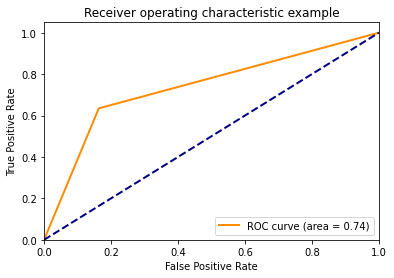

In [91]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % AUC,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

# 12.Let's try to close the end to end process and try to improve our model


In [101]:
# Most common parameters
MAX_DEPTH = [2, 5, 10, 25, 50]
MIN_SAMPLE_SPLIT = [2, 10, 20, 50]
MAX_FEATURES = [ 1,2,3,4,5,6,7, 8]


In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
parameters = {'max_depth':MAX_DEPTH, 'min_samples_split':MIN_SAMPLE_SPLIT, "max_features":MAX_FEATURES}

In [104]:
clf = GridSearchCV(DTclf, parameters, cv=5, scoring="accuracy")

In [109]:
clf.fit(X.drop("Survived", axis=1), y)

/home/local/FARFETCH/tiago.cabo/anaconda3/envs/titanic/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/home/local/FARFETCH/tiago.cabo/anaconda3/envs/titanic/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/local/FARFETCH/tiago.cabo/anaconda3/envs/titanic/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/local/FARFETCH/tiago.cabo/anaconda3/envs/titanic/lib/python3.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 5, 10, 25, 50],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 10, 20, 50]},
             scoring='accuracy')

# 13. Find best parameters

In [112]:
# check best params
clf.best_params_

{'max_depth': 25, 'max_features': 4, 'min_samples_split': 20}

In [113]:
clf.best_score_


0.8238528654823927

In [114]:
best_model = clf.best_estimator_

In [115]:
# since our best model only requires 4 features, we need to select them
best_model.feature_importances_

array([0.11998705, 0.4490077 , 0.15522128, 0.040352  , 0.03581705,
       0.18034243, 0.0192725 ])

In [116]:
X.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [117]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.500000,0,0,7.8292,2
893,3,1,47.000000,1,0,7.0000,0
894,2,0,62.000000,0,0,9.6875,2
895,3,0,27.000000,0,0,8.6625,0
896,3,1,22.000000,1,1,12.2875,0
...,...,...,...,...,...,...,...
1305,3,0,29.699118,0,0,8.0500,0
1306,1,1,39.000000,0,0,108.9000,1
1307,3,0,38.500000,0,0,7.2500,0


In [118]:
# lets make predictions
predictions= best_model.predict(df_test)

In [119]:
# write new model to kaggle

# Let's create a function
def write_results_to_disk(test_data, predictions, csv_name):
    data = test_data.copy(deep=True)
    data["Survived"] = predictions
    data = data[["Survived"]]
    data.reset_index(inplace=True)
    data.to_csv(csv_name, index=False)
    print(f"Successfully written {csv_name}")

In [120]:
write_results_to_disk(test_data=df_test, predictions=predictions, csv_name="submission_v2.csv")

Successfully written submission_v2.csv


# 14. Let's Improve the features

In [121]:
importances = best_model.feature_importances_

As we can see from above the 1st, 2nd, 3rd and 4rd have the most total importance

importances

In [122]:
features_to_keep = ["Pclass", "Sex", "Age", "Fare"]

In [123]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [124]:
# so if we train the same model
MAX_DEPTH = [2, 5, 10, 25, 50]
MIN_SAMPLE_SPLIT = [2, 10, 20, 50]
MAX_FEATURES = [ 1,2,3,4]
parameters = {'max_depth':MAX_DEPTH, 'min_samples_split':MIN_SAMPLE_SPLIT, "max_features":MAX_FEATURES}
clf = GridSearchCV(DTclf, parameters, cv=5, scoring="accuracy")
clf.fit(X[features_to_keep], y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 5, 10, 25, 50],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [2, 10, 20, 50]},
             scoring='accuracy')

In [125]:
clf.best_params_

{'max_depth': 5, 'max_features': 3, 'min_samples_split': 2}

In [126]:
clf.best_score_

0.8204381394764925

In [127]:
best_model_2 = clf.best_estimator_

In [100]:
# lets make predictions
predictions_2= best_model_2.predict(df_test[features_to_keep])

In [101]:
write_results_to_disk(test_data=df_test, predictions=predictions_2, csv_name="submission_v3.csv")

Successfully written submission_v3.csv
